In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [33]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Loan_Status'>

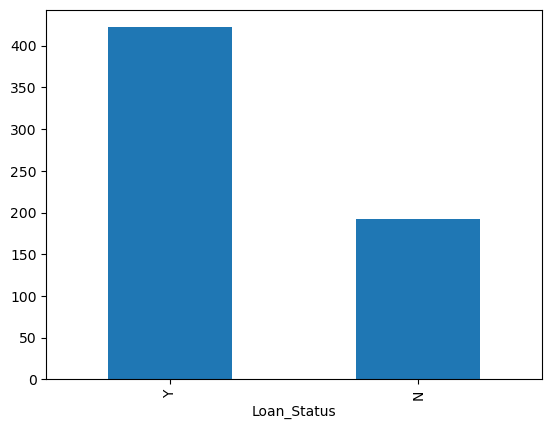

In [10]:
train['Loan_Status'].value_counts().plot(kind='bar')

In [11]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns


In [12]:
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
numeric_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

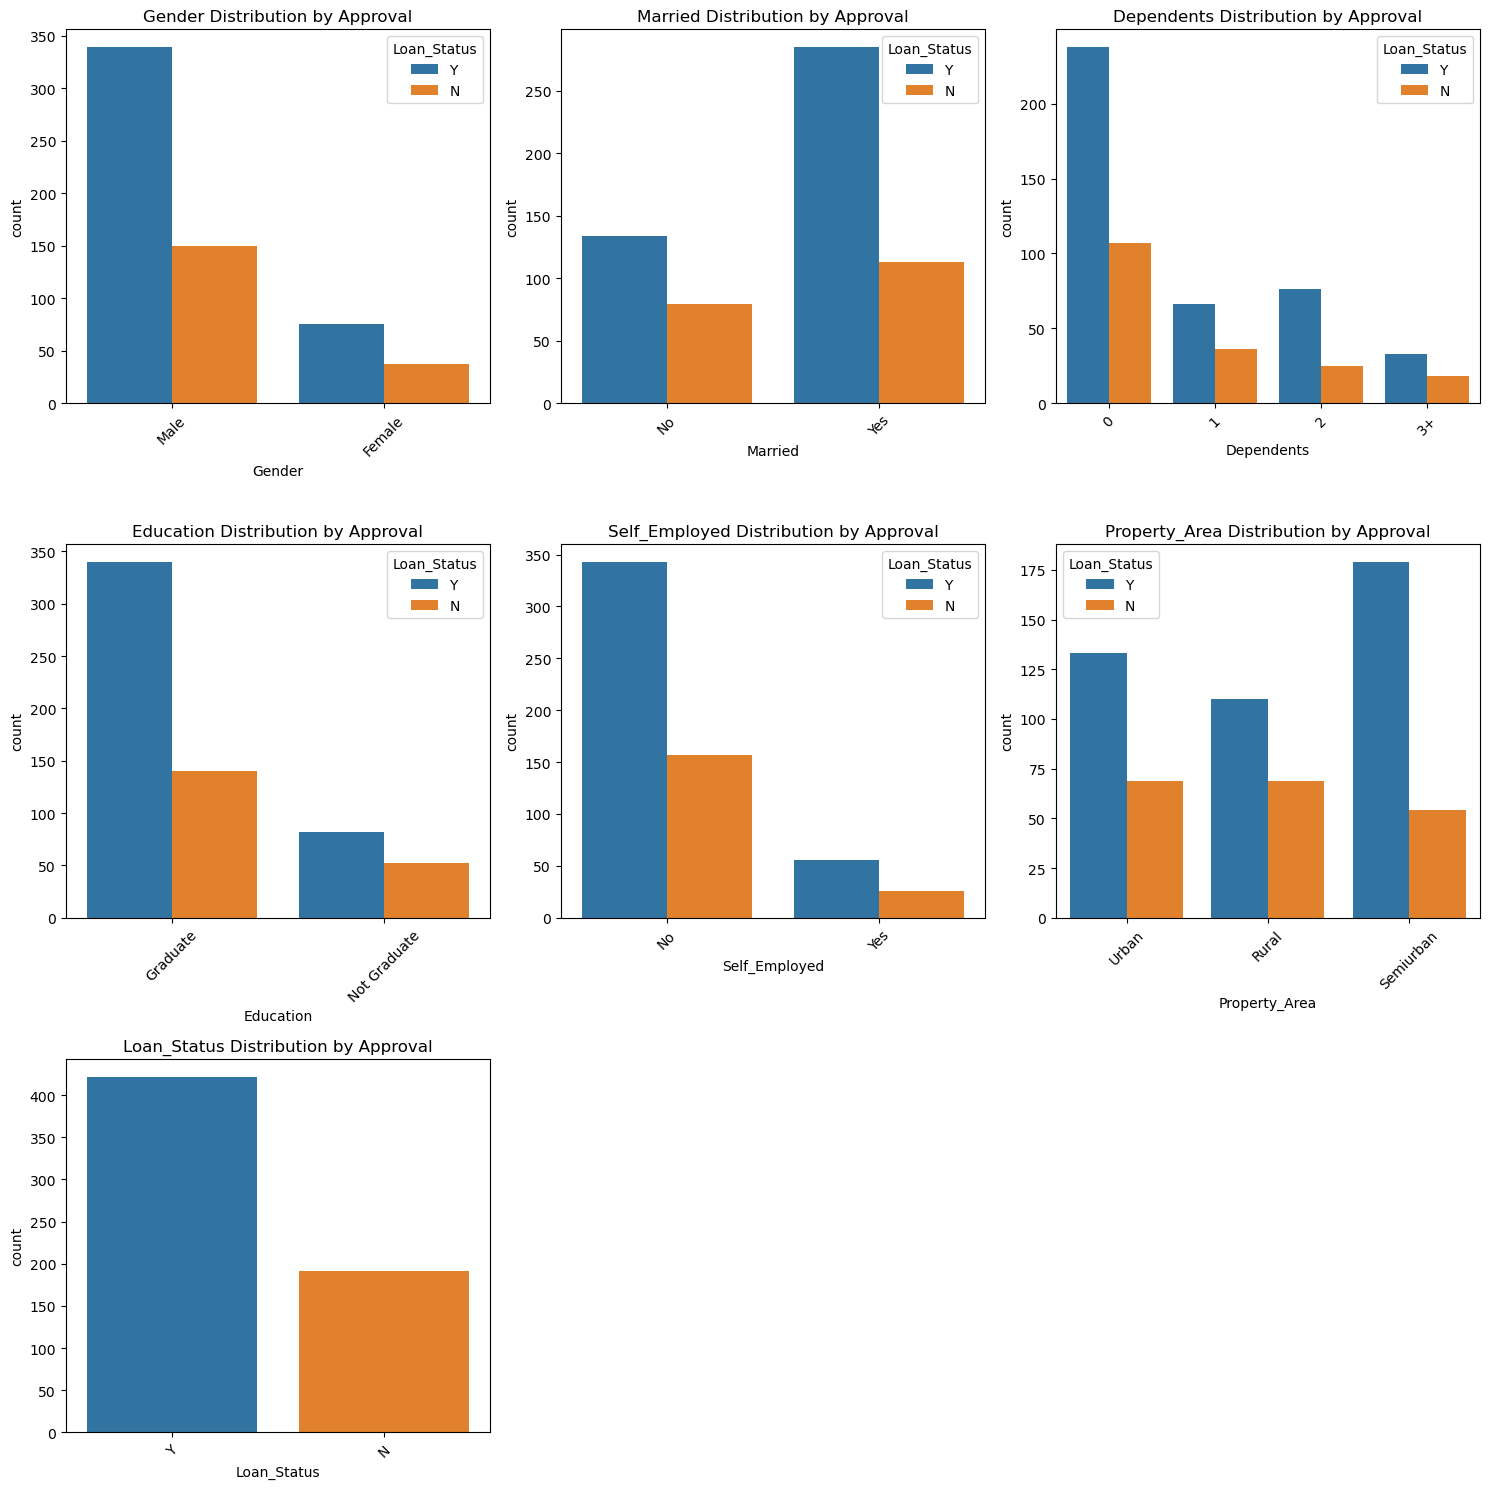

In [18]:
data = train.drop('Loan_ID',axis=1)
features = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Loan_Status', data=data)
    plt.title(f'{feature} Distribution by Approval')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

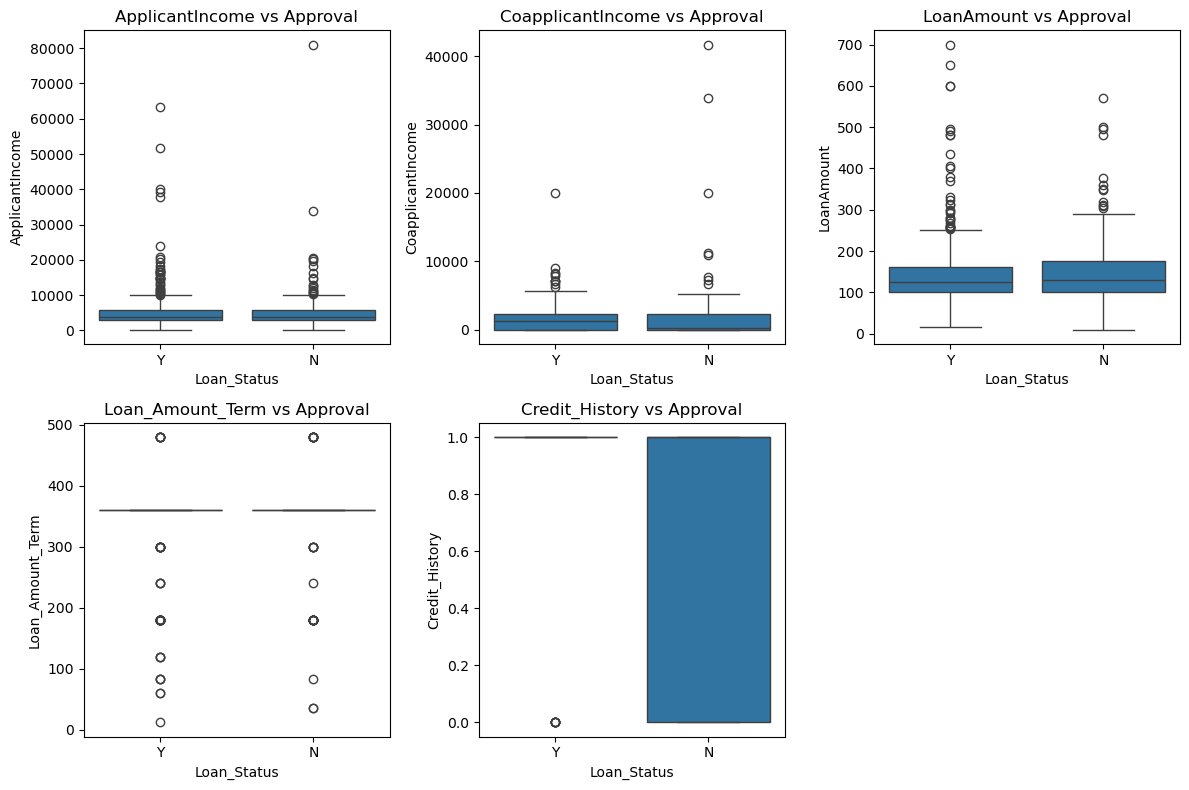

In [20]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Loan_Status', y=feature, data=train)
    plt.title(f'{feature} vs Approval')
plt.tight_layout()
plt.show()


In [98]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

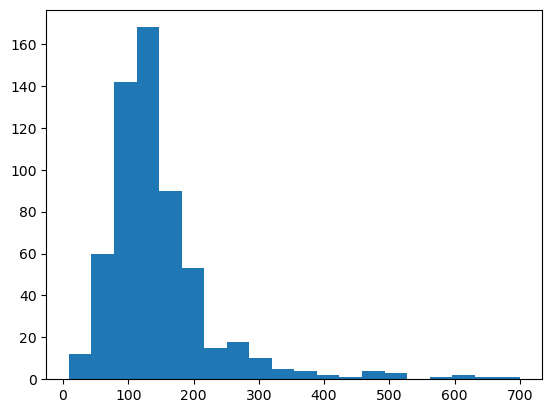

In [23]:
plt.hist(train['LoanAmount'],bins=20)
plt.show()

In [99]:
def traiter_valeurs_manquantes_et_selection(df):
    df_clean = df.copy()
    # 1. Traitement des valeurs manquantes
    # Numériques
    num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
    
    for col in num_cols:
      if col in df_clean.columns:
         df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Catégorielles
    cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
    
    for col in cat_cols:
      if col in df_clean.columns:
         df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
         
    # 2. Gestion des colonnes
    ids = df_clean.get('Loan_ID', pd.Series())
    # Colonnes à supprimer
    cols_to_drop = ['Loan_ID']
    df_clean.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    return ids, df_clean

In [108]:
def create_features(df):
    df = df.copy()

    # Total income
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    

    # Indicateur de revenu élevé
    df['High_Income'] = (df['Total_Income'] > 10000).astype(int)

    # Interactions utiles
    df['Has_Coapplicant'] = (df['CoapplicantIncome'] > 0).astype(int)
    
    df = df.drop('Loan_Amount_Term',axis = 1)
    
    df['LoanAmount'] = np.log(df['LoanAmount'])
    df['LoanAmount'].hist(bins=20)

    return df


In [109]:
def traiter_et_creer_features(df):
    ids, df_clean = traiter_valeurs_manquantes_et_selection(df)
    
    df_clean = create_features(df_clean)

    return ids, df_clean


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def encodetarget(df):
    df_clean = df.copy()
    le = LabelEncoder()
    df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])
    
    return df_clean,le

def preprocess_for_training(df):
    ids, df_clean = traiter_et_creer_features(df)
    label_encoders = {}
    
    for col in ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']:
        if col in df_clean.columns:
            le = LabelEncoder()
            df_clean[col] = le.fit_transform(df_clean[col])
            label_encoders[col] = le
    
    df_clean,targetLe = encodetarget(df_clean)      
    
    X = df_clean.drop(columns=['Loan_Status'])
    y = df_clean['Loan_Status']
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    
    return ids,X_train, X_test, y_train, y_test, label_encoders,targetLe


C:\Users\etudiant\AppData\Local\Temp\ipykernel_11996\3937864346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\etudiant\AppData\Local\Temp\ipykernel_11996\3937864346.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123


Confusion Matrix:
[[18 25]
 [ 3 77]]


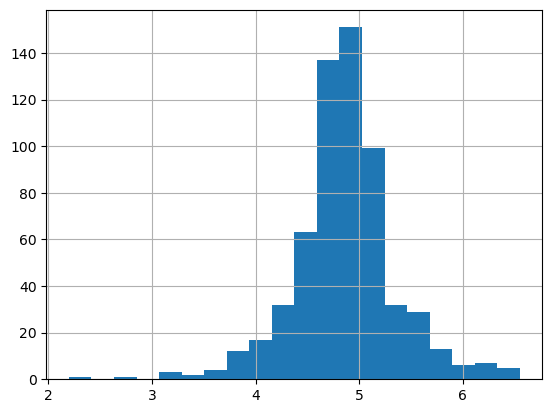

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

ids,X_train, X_test, y_train, y_test, label_encoders ,targetLe= preprocess_for_training(train)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [79]:
from sklearn.ensemble import GradientBoostingClassifier
# Créer le modèle GBM
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Entraîner le modèle
gbm_model.fit(X_train, y_train)
# Prédiction et évaluation
y_pred_gbm = gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy of GBM: {accuracy_gbm:.2f}")


Accuracy of GBM: 0.76


In [39]:
def preprocess_for_testing(df, label_encoders):
    ids,df_clean = traiter_et_creer_features(df)
    for col in ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']:
        if col in df_clean.columns and col in label_encoders:
            le = label_encoders[col]
            df_clean[col] = le.transform(df_clean[col])
            
    return ids,df_clean

In [40]:
ids_test , X_test_final = preprocess_for_testing(test, label_encoders)
y_test_pred = rf_model.predict(X_test_final)

submission_df = pd.DataFrame({
'Loan_ID': ids_test,
'Approve Loan': y_test_pred
})

submission_df

C:\Users\etudiant\AppData\Local\Temp\ipykernel_11996\3937864346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\etudiant\AppData\Local\Temp\ipykernel_11996\3937864346.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,Loan_ID,Approve Loan
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [41]:
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [42]:
y_cat = targetLe.inverse_transform(y_test_pred)
y_cat

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y